In [75]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import datajoint as dj
from pprint import pprint 
dj.config['loglevel'] = 'INFO'
from pipeline import rf, pre, utils, trk
import numpy as np
from pipeline import rf,trk,aodpre
import aodtrk
key = dict(mouse_id=8394,scan_idx=14)
frames = aodtrk.TrackInfo().get_frames(key)

INFO:root:Setting loglevel to INFO
DEBUG:datajoint.relational_operand:SELECT `mouse_id`,`exp_date`,`scan_idx`,`hdf5_file` FROM `pipeline_aod_preprocessing`.`_scan` WHERE (`mouse_id`=8394 AND `scan_idx`=14)
DEBUG:datajoint.connection:Executing SQL:SELECT `mouse_id`,`exp_date`,`scan_idx`,`hdf5_file` FROM `pipeline_aod_preprocessing`.`_scan` WHERE (`mouse_id`=8394 AND `scan_idx`=14)
DEBUG:datajoint.relational_operand:SELECT `mouse_id`,`exp_date`,`scan_idx`,`base_video_path` FROM `pipeline_aod_pupiltracking`.`_track_info` WHERE (`mouse_id`=8394 AND `scan_idx`=14)
DEBUG:datajoint.connection:Executing SQL:SELECT `mouse_id`,`exp_date`,`scan_idx`,`base_video_path` FROM `pipeline_aod_pupiltracking`.`_track_info` WHERE (`mouse_id`=8394 AND `scan_idx`=14)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


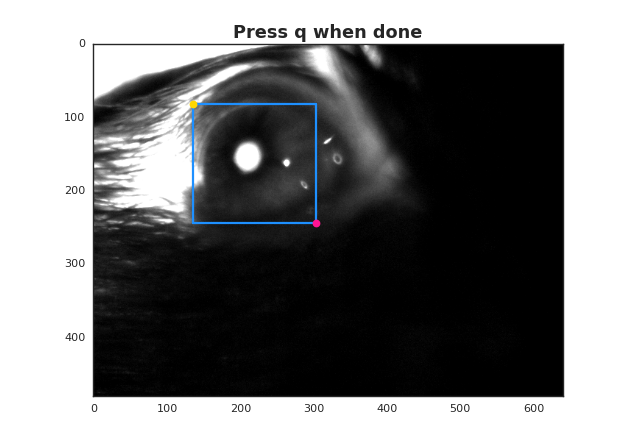

In [76]:
rg = utils.ROIGrabber(frames.mean(axis=2))

In [77]:
roi = rg.roi
x_roi_min = min(roi[0], roi[2])
x_roi_max = max(roi[0], roi[2])
y_roi_min = min(roi[1], roi[3])
y_roi_max = max(roi[1], roi[3])
key['x_roi_min'] = x_roi_min
key['y_roi_min'] = y_roi_min
key['x_roi_max'] = x_roi_max
key['y_roi_max'] = y_roi_max
key

{'mouse_id': 8394,
 'scan_idx': 14,
 'x_roi_max': 304,
 'x_roi_min': 136,
 'y_roi_max': 244,
 'y_roi_min': 82}

In [78]:
key['exp_date'] = (aodtrk.TrackInfo() & key).fetch1['exp_date']
aodtrk.Roi().insert1(key)

DEBUG:datajoint.relational_operand:SELECT `mouse_id`,`exp_date`,`scan_idx` FROM `pipeline_aod_pupiltracking`.`_track_info` WHERE (`scan_idx`=14 AND `mouse_id`=8394)
DEBUG:datajoint.connection:Executing SQL:SELECT `mouse_id`,`exp_date`,`scan_idx` FROM `pipeline_aod_pupiltracking`.`_track_info` WHERE (`scan_idx`=14 AND `mouse_id`=8394)
DEBUG:datajoint.connection:Executing SQL:INSERT INTO `pipeline_aod_pupiltracking`.`roi` (`mouse_id`,`exp_date`,`scan_idx`,`x_roi_min`,`y_roi_min`,`x_roi_max`,`y_roi_max`) VALUES (%s,%s,%s,%s,%s,%s,%s)


In [79]:
aodtrk.Roi().fetch

DEBUG:datajoint.relational_operand:SELECT `mouse_id`,`exp_date`,`scan_idx`,`x_roi_min`,`y_roi_min`,`x_roi_max`,`y_roi_max` FROM `pipeline_aod_pupiltracking`.`roi` LIMIT 50
DEBUG:datajoint.connection:Executing SQL:SELECT `mouse_id`,`exp_date`,`scan_idx`,`x_roi_min`,`y_roi_min`,`x_roi_max`,`y_roi_max` FROM `pipeline_aod_pupiltracking`.`roi` LIMIT 50
DEBUG:datajoint.connection:Executing SQL:SELECT count(*) FROM `pipeline_aod_pupiltracking`.`roi`
DEBUG:datajoint.connection:Executing SQL:SELECT count(*) FROM `pipeline_aod_pupiltracking`.`roi`


mouse_id       exp_date       scan_idx       x_roi_min      y_roi_min      x_roi_max      y_roi_max     
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
7922           2016-02-10     8              127            74             319            274           
7922           2016-02-10     11             126            86             319            270           
7922           2016-02-10     16             123            117            296            278           
7922           2016-02-10     19             141            120            308            275           
7922           2016-02-10     22             136            129            295            273           
7922           2016-02-10     25             162            146            293            255           
7922           2016-02-10     28             160            140            293            262           
7922           2016-02-10     31             149       

In [64]:
import datajoint as dj
dj.config['display.limit'] = 50

INFO:root:Setting display.limit to 50
